# Lab 4b: PCA and Image Compression

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [14,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1:  Preparing the Image

### 1A) Import and view an image

1. Import `lorikeet.png` using pyplot's [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
2. Print the shape of the image
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
4. Show the pyplot


(678, 907, 4)


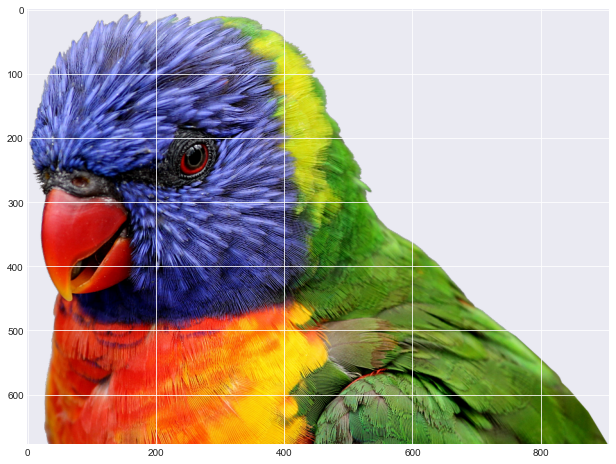

In [3]:
from sklearn.decomposition import PCA

#import lorikeet.png using imread
lorikeet = plt.imread('img/lorikeet.png')

#shape of lorikeet
print(lorikeet.shape)
#display image
plt.imshow(lorikeet)

### 1B) Normalized Average

1. Reshape your image for compression
    1. Reshape your 3 dimensional `NxMxO` array to be a 2 dimensional `Nx(M*O)` array and assign it to a new variable (`color_flat`).
2. Calculate the Normalized Average
    2. Find the [Sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) of each of `color_flat`'s columns, and assign it to a new variable 
    3. Normalize the 1D array by subtracting its minimum and dividing by its range. 
    4. Your normalized average should have the shape `(M*O,)`

In [11]:
#Reshape image for compression
color_flat = lorikeet.reshape(678, -1)
print(color_flat.shape)

#Normalize meana
#sum of each color_flat columns assign it to a new variable
col_sum = color_flat.sum(axis = 0)

#Normalize the column_sum
col_sum_norm = (col_sum - col_sum.min())/ (col_sum.max() - col_sum.min())

#shape of normalized col_sum
col_sum_norm.shape

(678, 3628)


(3628,)

## Task 2:  Compressing the Image

### Find the Image's Principle Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principle components
1. Create an instance of the PCA class with 400 components
2. Call the method `fit_transform` with `color_flat` minus the normalized average as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `Nx400` and the PCA's components should have the shape `400x(M*O)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. Include a title, and meaningful x and y labels.

(678, 400)
(400, 3628)


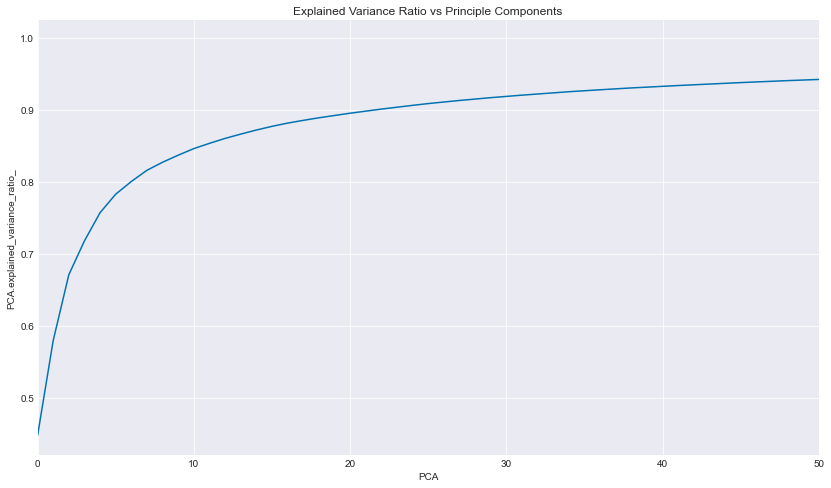

In [5]:
#Create an instance of PCA with 400 components
pca = PCA(n_components=400)

#Call fit_transform with color_flat minus normalized averafe as X parameter
color_flat_transformed = pca.fit_transform(color_flat - col_sum_norm)

#print shape of transformed data
print(color_flat_transformed.shape)

#pca components
print(pca.components_.shape)

#Create elbow plot of cumulative sum of PCA explained variance ratio
pca_evr_csum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_evr_csum)
plt.xlabel('PCA')
plt.ylabel('PCA.explained_variance_ratio_')
plt.xlim(0,50)
plt.title('Explained Variance Ratio vs Principle Components')
plt.show()


## Task 3: Reconstruct the Image 

### Reconstruct the image accounting for 90-91% percent of the proportional variance

1. Using the elbow plot, determine a number of principle components which account for 90-91% percent of the proportional variance in the image.
1. Compute the inverse transform:
    1. `transformed_values@principle_components + normalize_average`
    2. With shapes `NxZ @ Zx(M*O) + (M*O,)`
    3. With `Z` equal to the number of principle components you are keeping
3. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
2. Compute the compression ratio of this image
    1. Compressed size = the number of floats required to compute the inverse transform
    2. Uncompressed size =  the number of floats in the original image
    3. Compression ratio = Compressed size / Uncompressed size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(678, 3628)
(678, 907, 4)
3628
Compressed_size: 111278
Uncompressed_size: 2459784
Compression rate:  0.0452


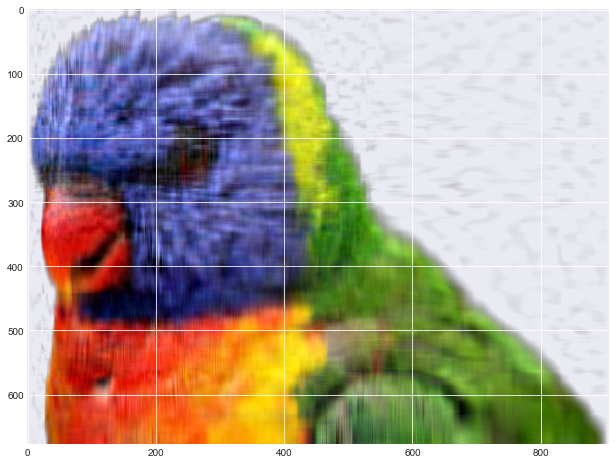

In [12]:
#Num of principle components that account for 90-91% of proportional variance in image = about 30 from elbow plot
#compute inverse transform
inverse_transform = color_flat_transformed[:,0:25]@pca.components_[0:25,:] + col_sum_norm

print(inverse_transform.shape)
#show reconstructed image
#clip values in reconstructed image
np.clip(inverse_transform, 0, 1)

#reshape reconstructed image back to shape of original image i.e. (678, 907, 4)
transformed_to_orig = inverse_transform.reshape((678, 907, 4))

print(transformed_to_orig.shape)
#display image
plt.imshow(transformed_to_orig)

#Compression ratio rate

compressed_size = color_flat_transformed[:,0:25].shape[0]*color_flat_transformed[:, 0:25].shape[1] + pca.components_[0:25,:].shape[0]*pca.components_[0:25,:].shape[1] + col_sum_norm.shape[0]

print(col_sum_norm.shape[0])

print(f"Compressed_size: {compressed_size}")

uncompressed_size = (lorikeet.shape[0]*lorikeet.shape[1]*lorikeet.shape[2])

print(f"Uncompressed_size: {uncompressed_size}")

compression_ratio = compressed_size/uncompressed_size

print(f"Compression rate: {compression_ratio: 0.4f}")